# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [39]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [40]:

def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean'):
   
    Cluster_Centroids = np.array(Cluster_Centroids)
    Data_points = np.array(Data_points)
    centroids, num_features = Cluster_Centroids.shape #to get the dimentions
    num_data_points = len(Data_points)
    
    Cluster_Distances = np.zeros((num_data_points, centroids))  # Initialize the matrix 
    
    if Distance_Type == 'euclidean':
        for i in range(centroids):
            distances = np.linalg.norm(Data_points - Cluster_Centroids[i], axis=1)
            Cluster_Distances[:, i] = distances

    elif Distance_Type == 'pearson':
        for i in range(centroids):
            centroid = Cluster_Centroids[i]
            centroid_mean = np.mean(centroid)
            centroid_std = np.std(centroid)
            data_points_mean = np.mean(Data_points, axis=1)
            data_points_std = np.std(Data_points, axis=1)
            distances = np.sum(((Data_points - data_points_mean[:, None]) * (centroid - centroid_mean)) / (data_points_std[:, None] * centroid_std), axis=1)
            Cluster_Distances[:, i] = distances

    return Cluster_Distances



> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [82]:
 # write code for intial cluster heads here 
def initialize_cluster_heads(data, K):
    data_ranges = np.ptp(data, axis=0)
    # Initialize cluster heads randomly
    cluster_heads = np.random.rand(K, data.shape[1]) * data_ranges + np.min(data, axis=0)
    return cluster_heads
# code for clustring
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iterations=100, epsilon=1e-4):
    def initialize_centroids(data_points, k):
        min_values = np.min(data_points, axis=0)
        max_values = np.max(data_points, axis=0)
        centroids = []
        for _ in range(k):
            centroid = [np.random.uniform(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
            centroids.append(centroid)
        return np.array(centroids)

    def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean'):
        Cluster_Centroids = np.array(Cluster_Centroids)
        Data_points = np.array(Data_points)
        centroids, num_features = Cluster_Centroids.shape
        num_data_points = len(Data_points)
        
        Cluster_Distances = np.zeros((num_data_points, centroids))
        
        if Distance_Type == 'euclidean':
            for i in range(centroids):
                distances = np.linalg.norm(Data_points - Cluster_Centroids[i], axis=1)
                Cluster_Distances[:, i] = distances

        elif Distance_Type == 'pearson':
            for i in range(centroids):
                centroid = Cluster_Centroids[i]
                centroid_mean = np.mean(centroid)
                centroid_std = np.std(centroid)
                data_points_mean = np.mean(Data_points, axis=1)
                data_points_std = np.std(Data_points, axis=1)
                distances = np.sum(((Data_points - data_points_mean[:, None]) * (centroid - centroid_mean)) / (data_points_std[:, None] * centroid_std), axis=1)
                Cluster_Distances[:, i] = distances

        return Cluster_Distances

    cluster_heads = initialize_cluster_heads(Data_points, Number_of_Clusters)
    cluster_assignments = np.zeros(len(Data_points), dtype=int)
    cluster_metric = float('inf')

    for _ in range(max_iterations):
        distances = GUC_Distance(cluster_heads, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)

        new_cluster_heads = np.array([np.mean(Data_points[cluster_assignments == i], axis=0) for i in range(Number_of_Clusters)])

        mean_square_distances = np.array([np.mean(np.linalg.norm(Data_points[cluster_assignments == i] - new_cluster_heads[i], axis=1)**2) for i in range(Number_of_Clusters)])
        new_cluster_metric = np.sum(mean_square_distances)

        if np.abs(new_cluster_metric - cluster_metric) < epsilon:
            break

        cluster_metric = new_cluster_metric
        cluster_heads = new_cluster_heads

    return cluster_heads, cluster_assignments, cluster_metric


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [42]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [35]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k'] #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

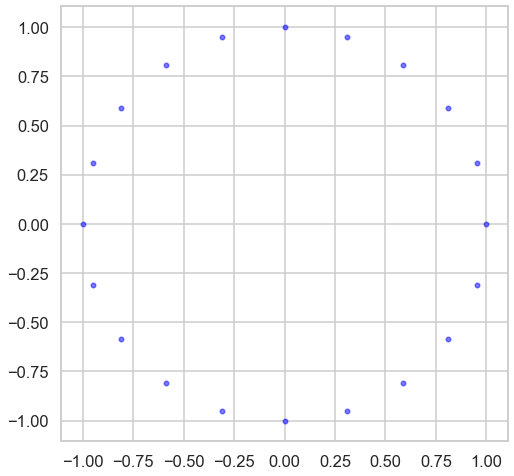

In [5]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

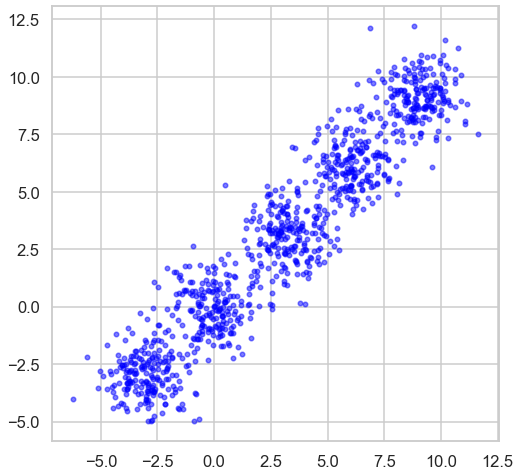

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

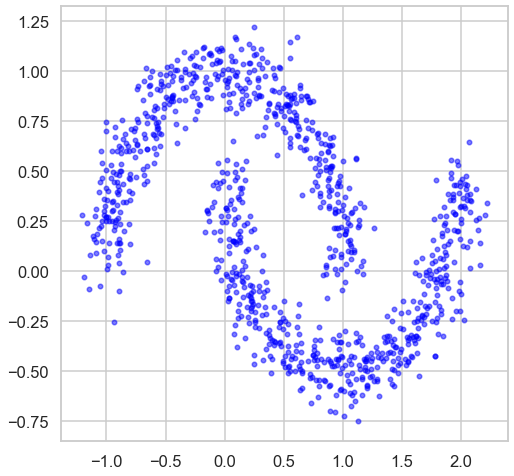

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.

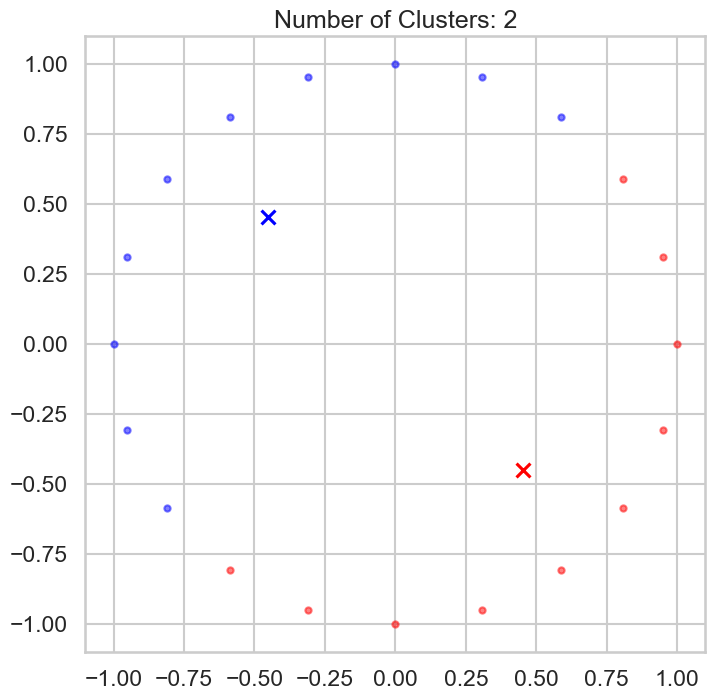

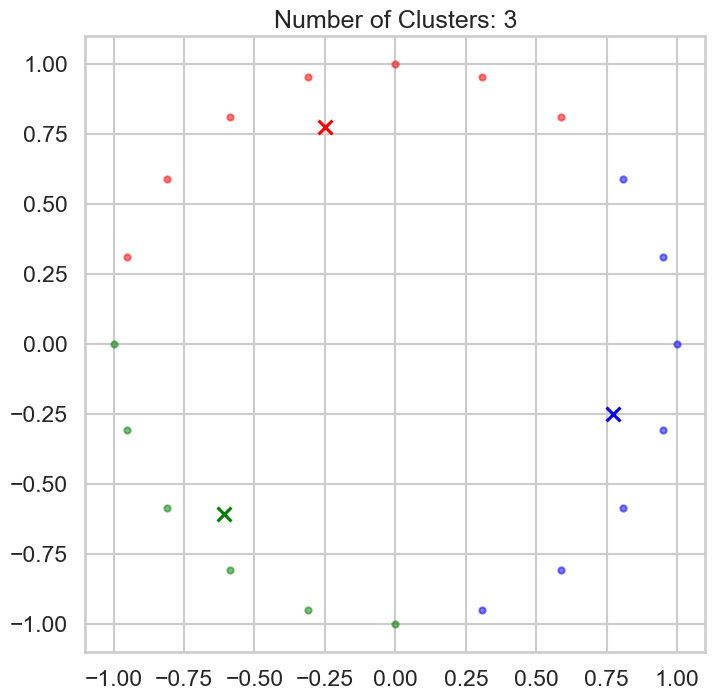

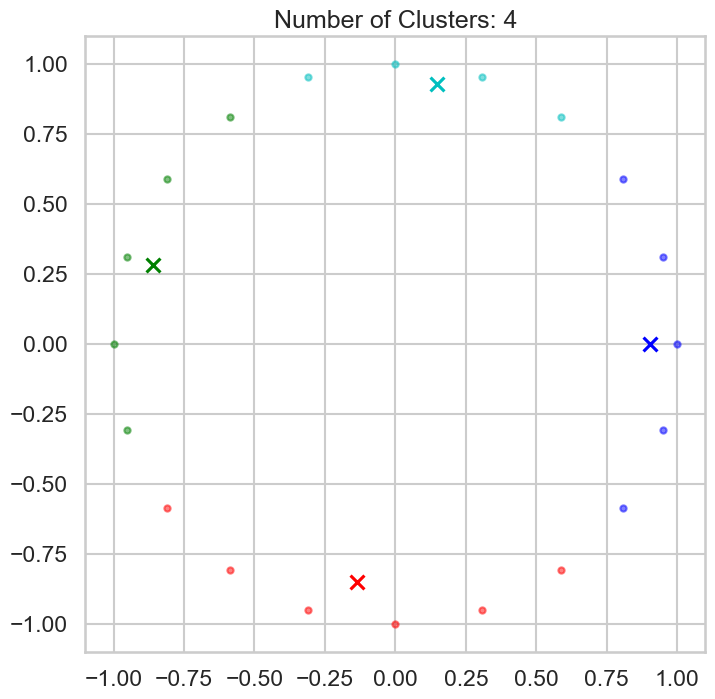

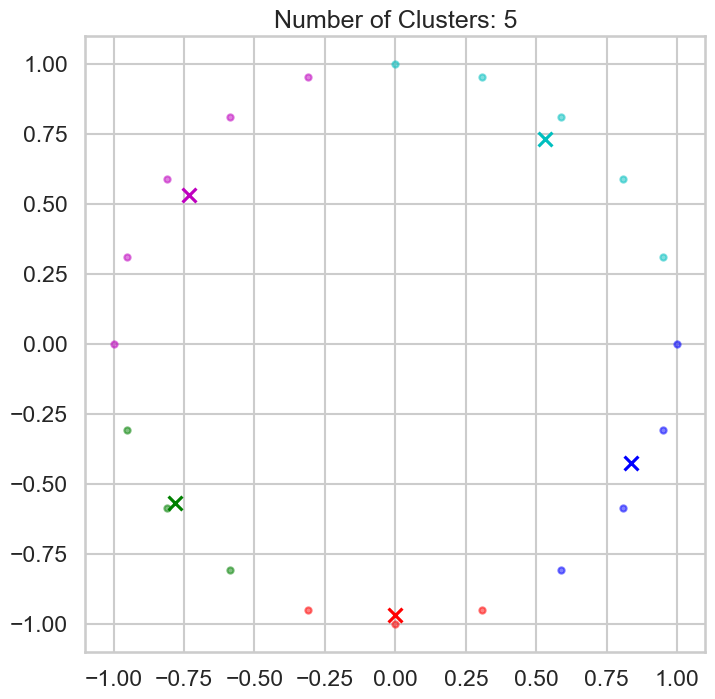

C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


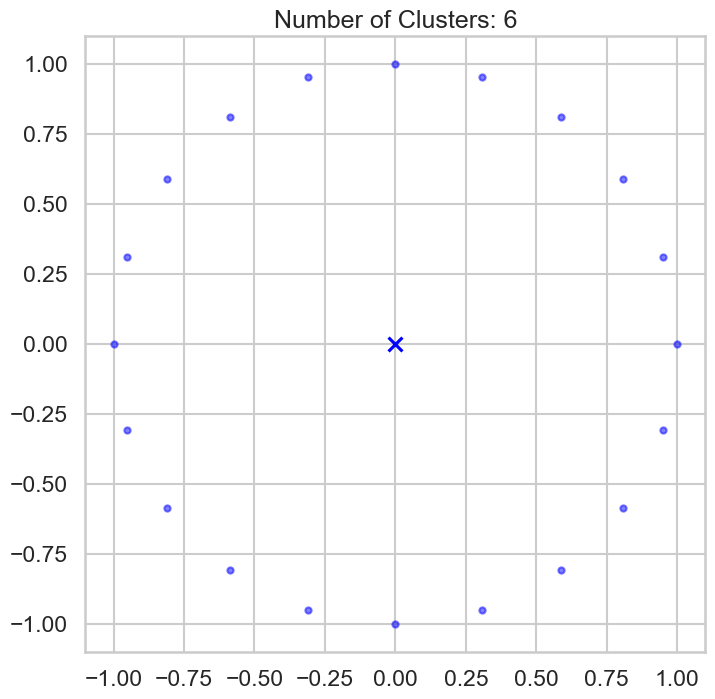

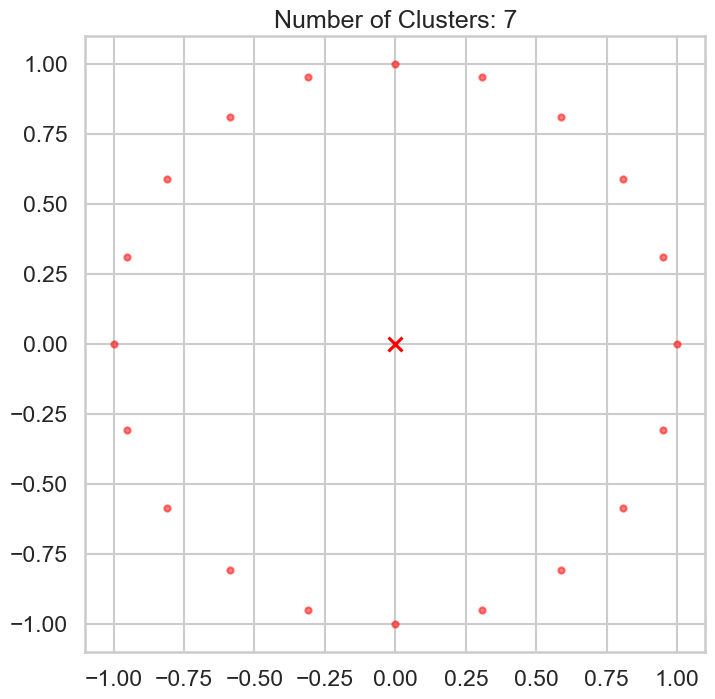

IndexError: list index out of range

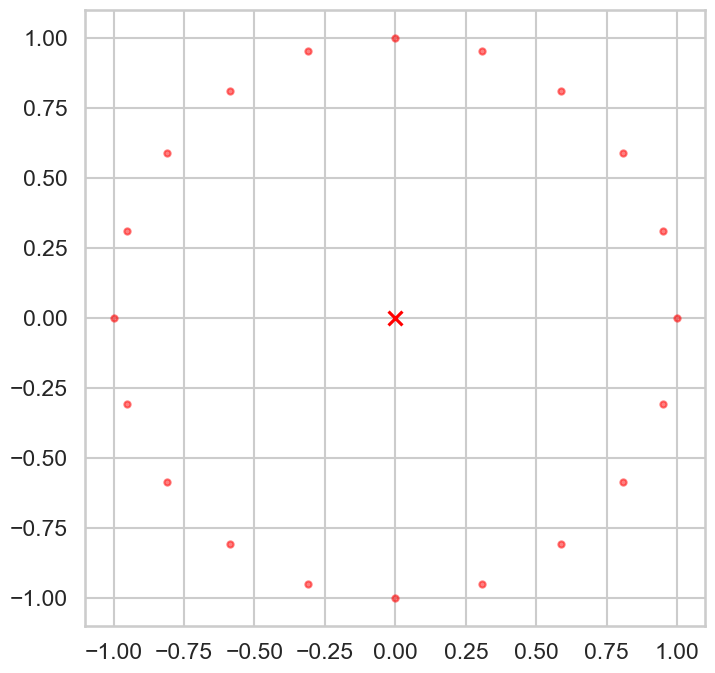

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons

def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean'):
    Cluster_Centroids = np.array(Cluster_Centroids)
    Data_points = np.array(Data_points)
    centroids, num_features = Cluster_Centroids.shape
    num_data_points = len(Data_points)
    
    Cluster_Distances = np.zeros((num_data_points, centroids))
    
    if Distance_Type == 'euclidean':
        for i in range(centroids):
            distances = np.linalg.norm(Data_points - Cluster_Centroids[i], axis=1)
            Cluster_Distances[:, i] = distances

    elif Distance_Type == 'pearson':
        for i in range(centroids):
            centroid = Cluster_Centroids[i]
            centroid_mean = np.mean(centroid)
            centroid_std = np.std(centroid)
            data_points_mean = np.mean(Data_points, axis=1)
            data_points_std = np.std(Data_points, axis=1)
            distances = np.sum(((Data_points - data_points_mean[:, None]) * (centroid - centroid_mean)) / (data_points_std[:, None] * centroid_std), axis=1)
            Cluster_Distances[:, i] = distances

    return Cluster_Distances

def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iterations=100, epsilon=1e-4):
    def initialize_centroids(data_points, k):
        min_values = np.min(data_points, axis=0)
        max_values = np.max(data_points, axis=0)
        centroids = []
        for _ in range(k):
            centroid = [np.random.uniform(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
            centroids.append(centroid)
        return np.array(centroids)

    cluster_heads = initialize_cluster_heads(Data_points, Number_of_Clusters)
    cluster_assignments = np.zeros(len(Data_points), dtype=int)
    cluster_metric = float('inf')

    for _ in range(max_iterations):
        distances = GUC_Distance(cluster_heads, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)

        new_cluster_heads = np.array([np.mean(Data_points[cluster_assignments == i], axis=0) for i in range(Number_of_Clusters)])

        mean_square_distances = np.array([np.mean(np.linalg.norm(Data_points[cluster_assignments == i] - new_cluster_heads[i], axis=1)**2) for i in range(Number_of_Clusters)])
        new_cluster_metric = np.sum(mean_square_distances)

        if np.abs(new_cluster_metric - cluster_metric) < epsilon:
            break

        cluster_metric = new_cluster_metric
        cluster_heads = new_cluster_heads
        for i in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignments == i]
            if len(points_in_cluster) > 0:  # Check if cluster is not empty
                cluster_heads[i] = np.mean(points_in_cluster, axis=0)

    return cluster_heads, cluster_assignments, cluster_metric

def display_cluster(X, km=None, num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
    else:
        cluster_heads, cluster_assignments = km
        for i in range(num_clusters):
            plt.scatter(X[cluster_assignments==i,0], X[cluster_assignments==i,1], c=color[i], alpha=alpha, s=s)
            plt.scatter(cluster_heads[i][0], cluster_heads[i][1], c=color[i], marker='x', s=100)

# Example 1
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X1 = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()

# Apply GUC_Kmean function to Example 1
num_clusters_range = range(2, 9)
for Number_of_Clusters in num_clusters_range:
    cluster_heads, cluster_assignments, cluster_metric = GUC_Kmean(X1, Number_of_Clusters, 'euclidean')
    display_cluster(X1, km=(cluster_heads, cluster_assignments), num_clusters=Number_of_Clusters)

    plt.title(f'Number of Clusters: {Number_of_Clusters}')
    plt.show()



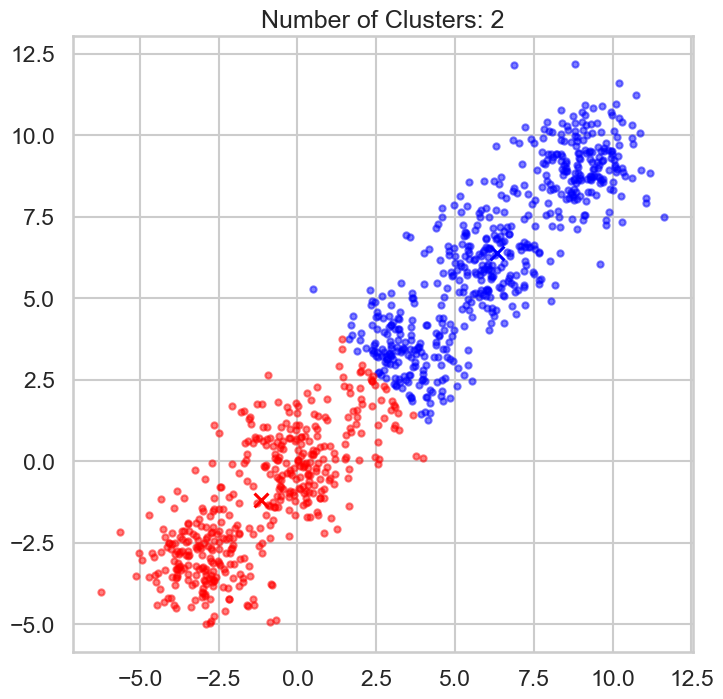

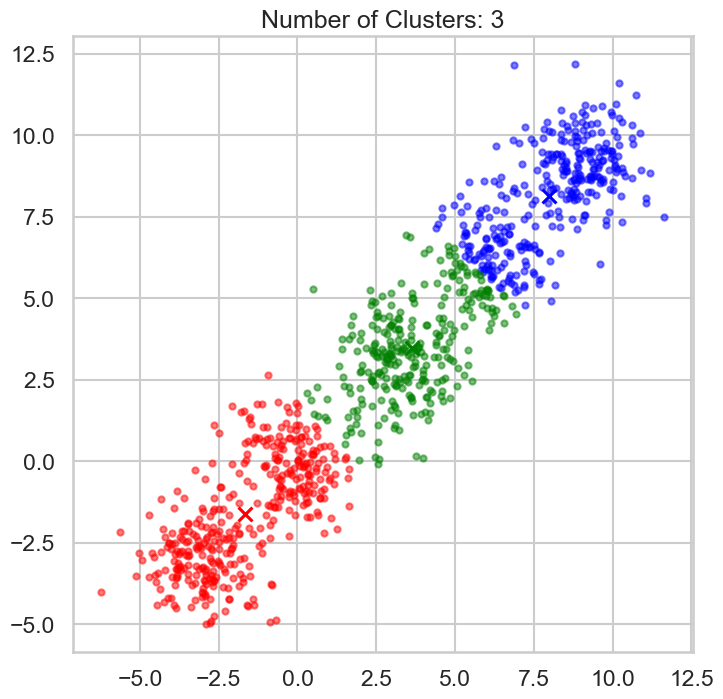

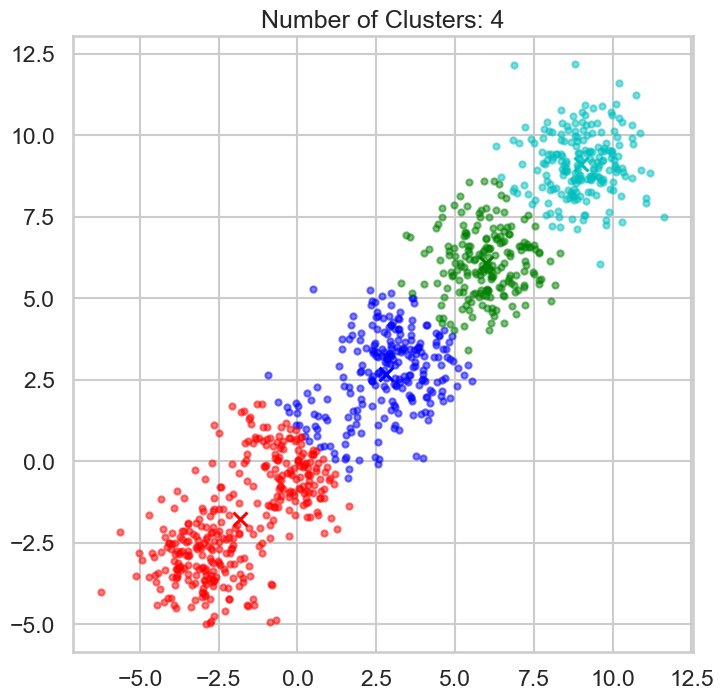

C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


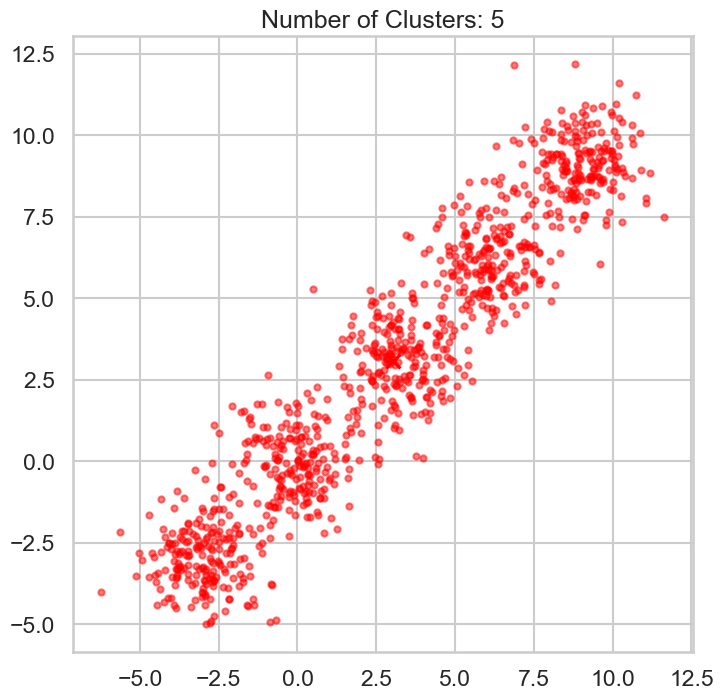

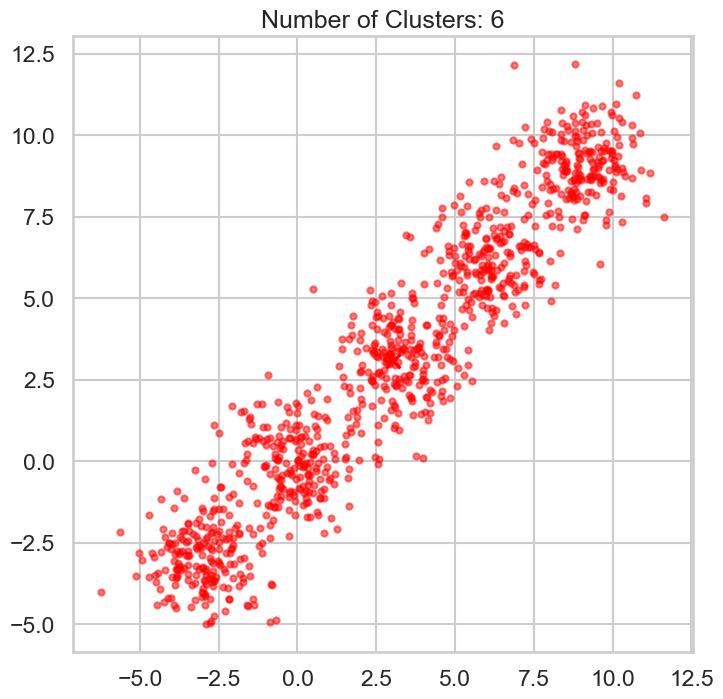

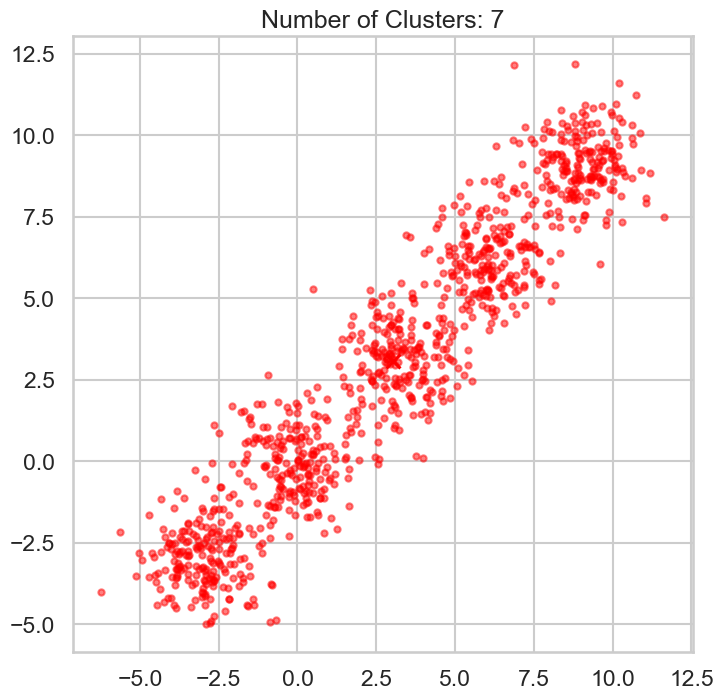

In [66]:
# Example 2
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# Apply KMeans clustering
num_clusters_range = range(2, 8)  # Number of clusters ranging from 2 to 10
for Number_of_Clusters in num_clusters_range:
    cluster_heads, cluster_assignments, cluster_metric = GUC_Kmean(X, Number_of_Clusters, 'euclidean')
    display_cluster(X, km=(cluster_heads, cluster_assignments), num_clusters=Number_of_Clusters)
    plt.title(f'Number of Clusters: {Number_of_Clusters}')
    plt.show()


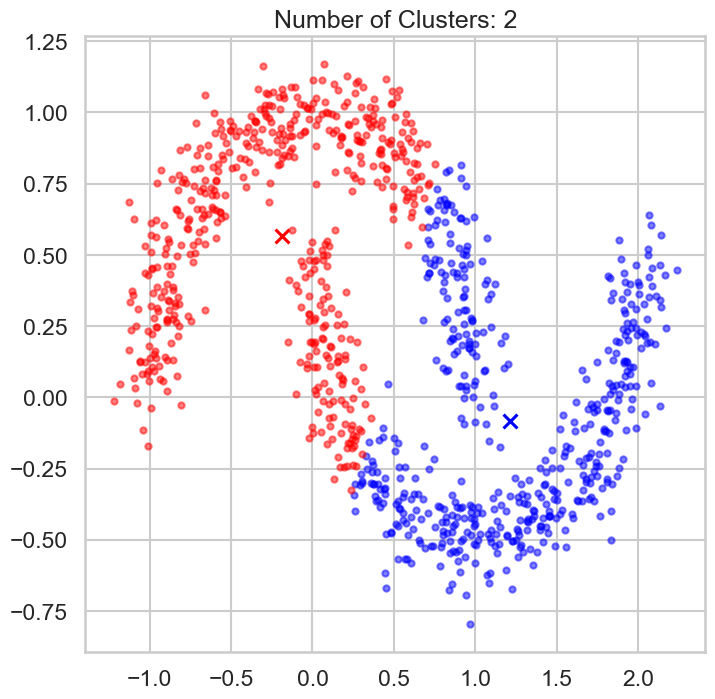

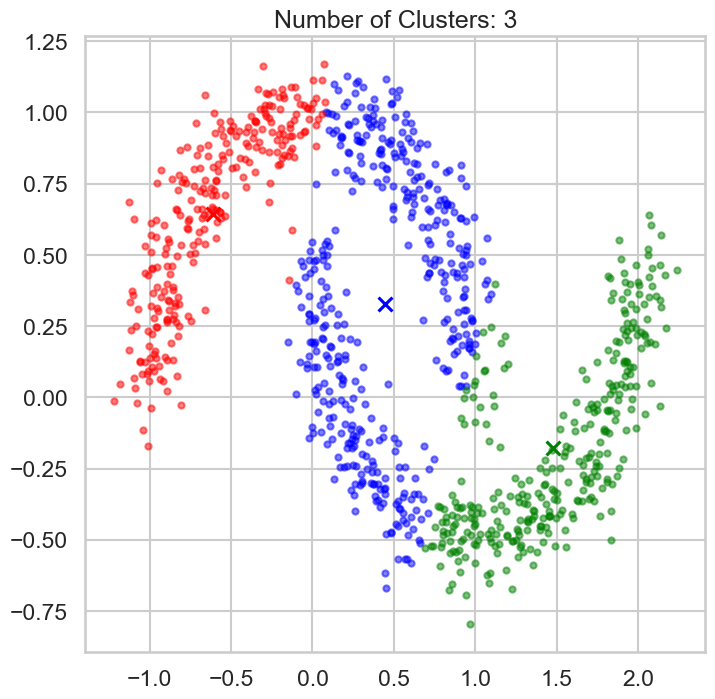

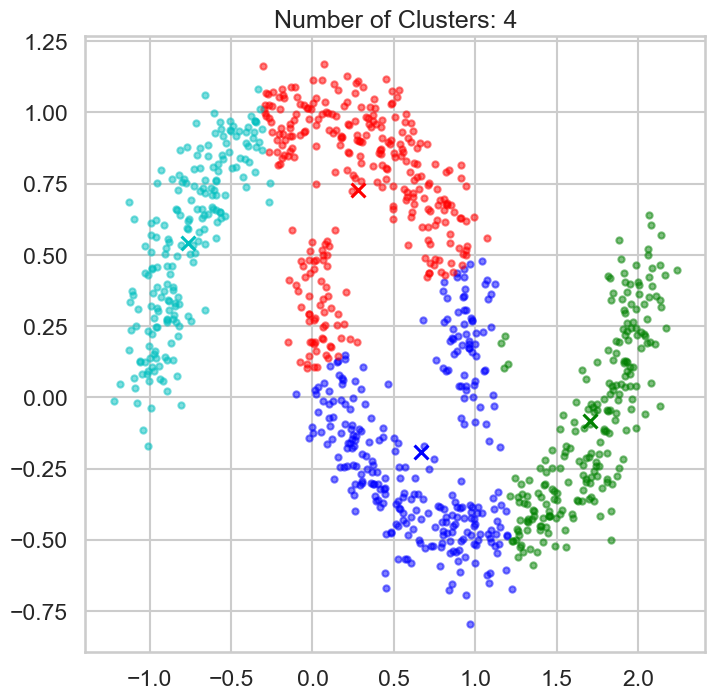

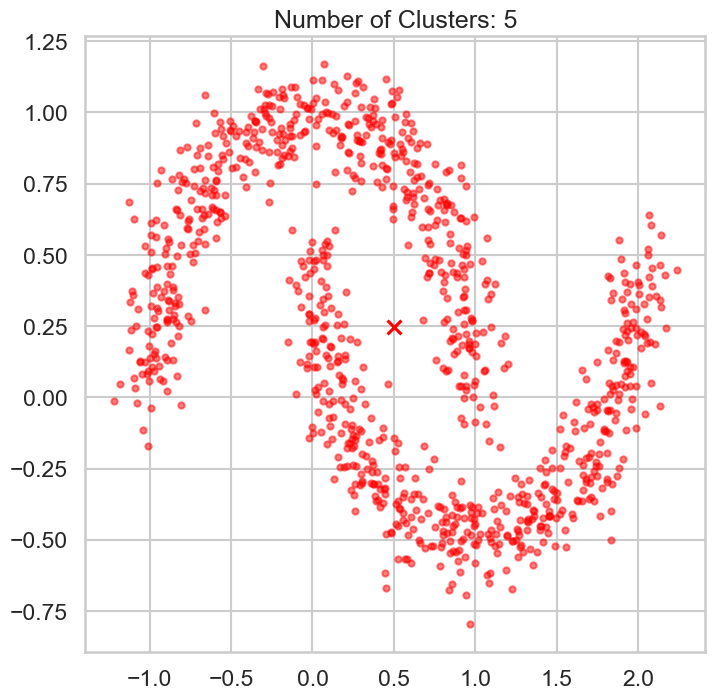

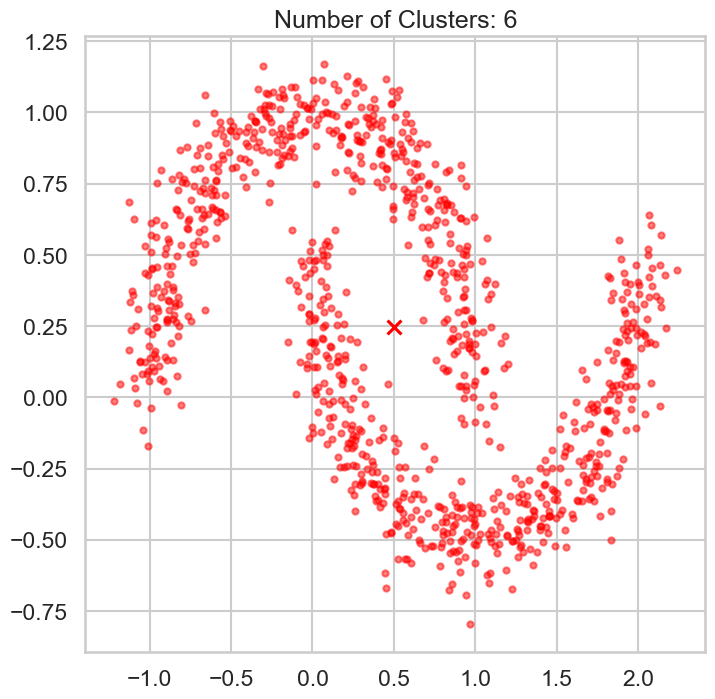

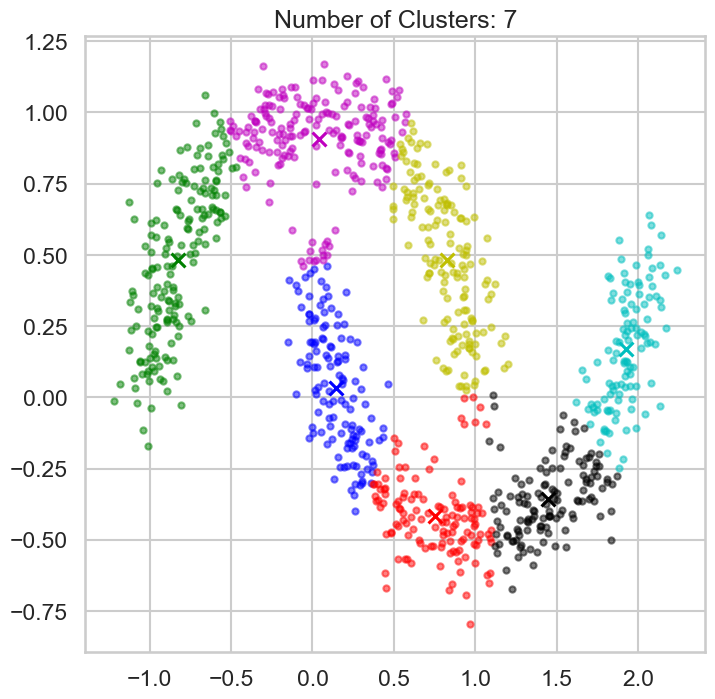

In [68]:
#Example 3
n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.1)
num_clusters_range = range(2, 8)
for Number_of_Clusters in num_clusters_range:
    cluster_heads, cluster_assignments, cluster_metric = GUC_Kmean(X, Number_of_Clusters, 'euclidean')
    display_cluster(X, km=(cluster_heads, cluster_assignments), num_clusters=Number_of_Clusters)
    plt.title(f'Number of Clusters: {Number_of_Clusters}')
    plt.show()


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.

In [73]:
#Reading the csv file 
customer_data = pd.read_csv("C:/Users/Sally/OneDrive/Desktop/ML/assigment 1/Customer data.csv")
customer_data

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [85]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
new_data = customer_data.drop(columns=['ID'])
data_matrix = new_data.values

In [86]:
pca = PCA(n_components=2)
df = pca.fit_transform(data_matrix)

C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Sally\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


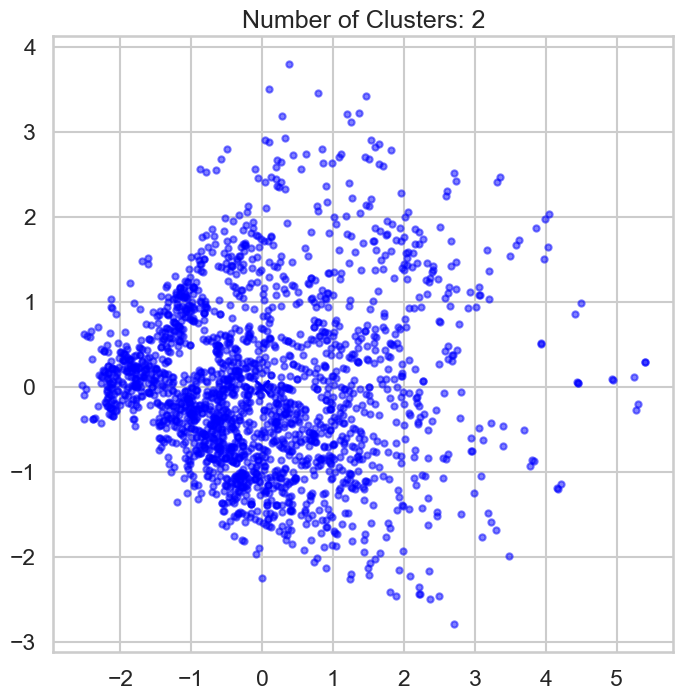

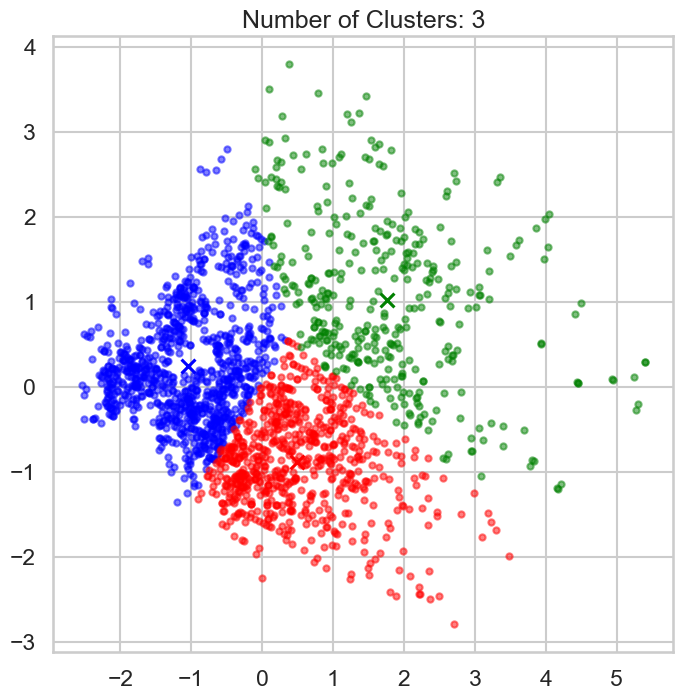

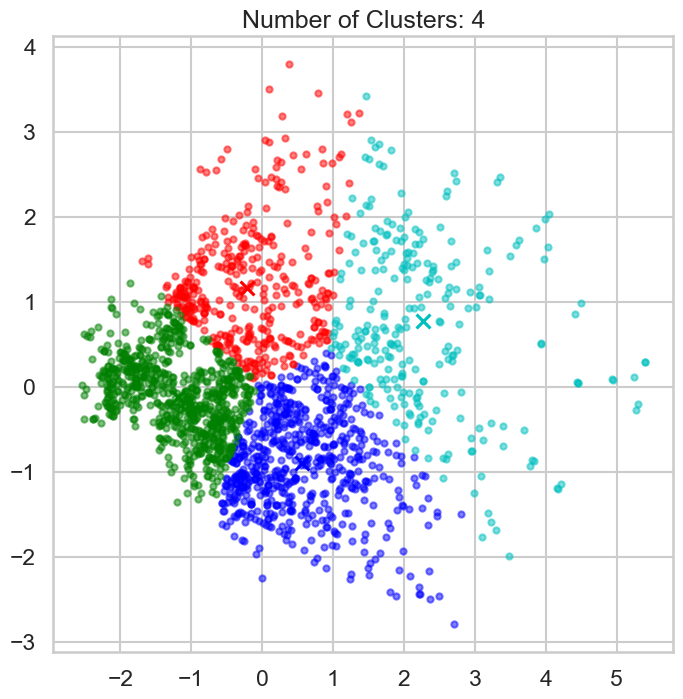

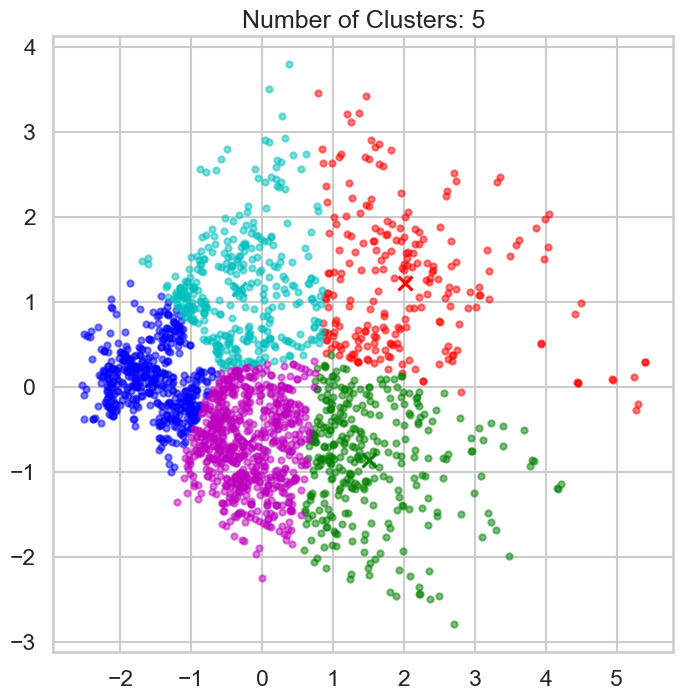

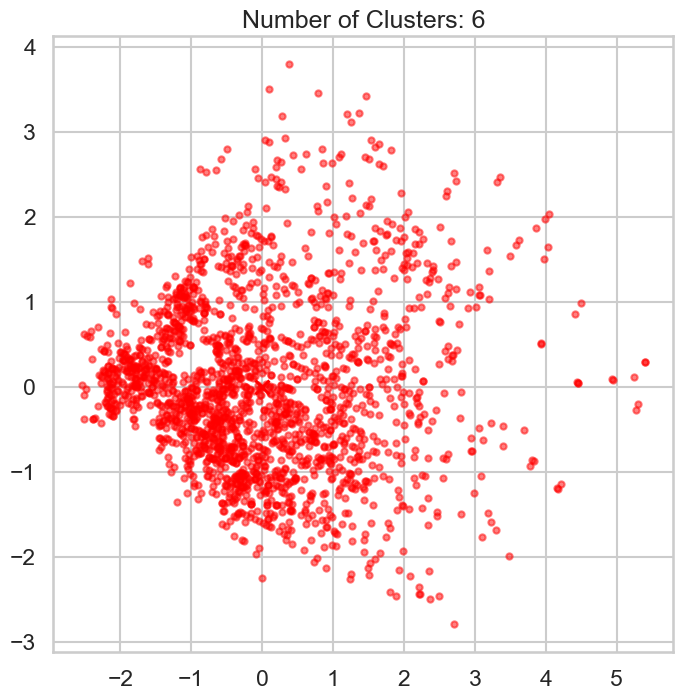

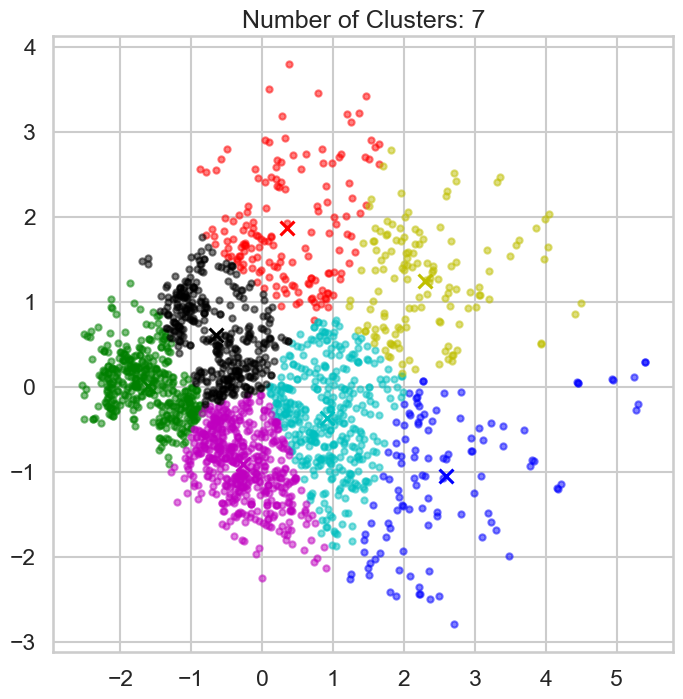

IndexError: list index out of range

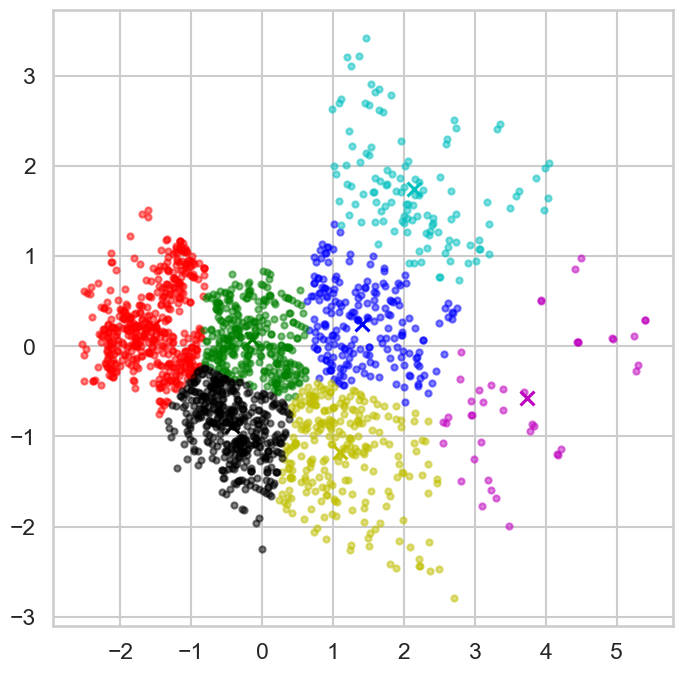

In [88]:
Data =df
num_clusters_range = range(2, 9)
for Number_of_Clusters in num_clusters_range:
    cluster_heads, cluster_assignments, cluster_metric = GUC_Kmean(Data, Number_of_Clusters, 'euclidean')
    display_cluster(Data, km=(cluster_heads, cluster_assignments), num_clusters=Number_of_Clusters)

    plt.title(f'Number of Clusters: {Number_of_Clusters}')
    plt.show()



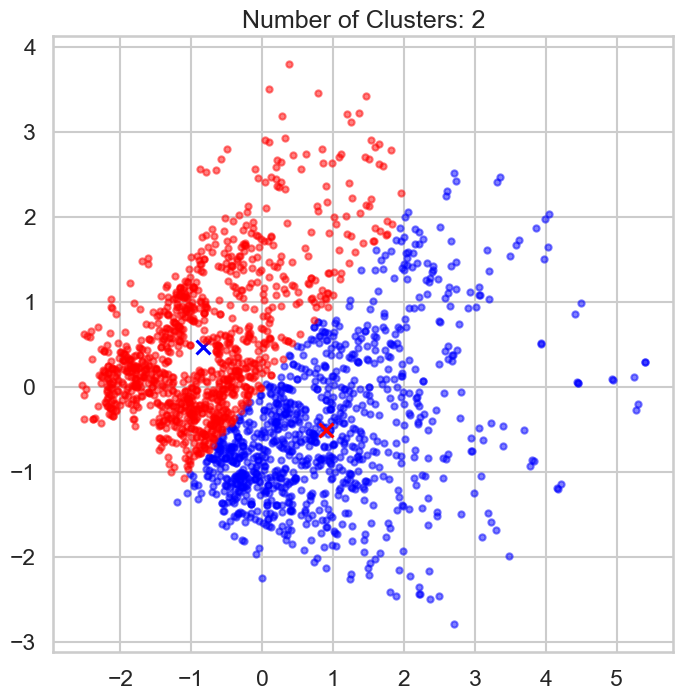

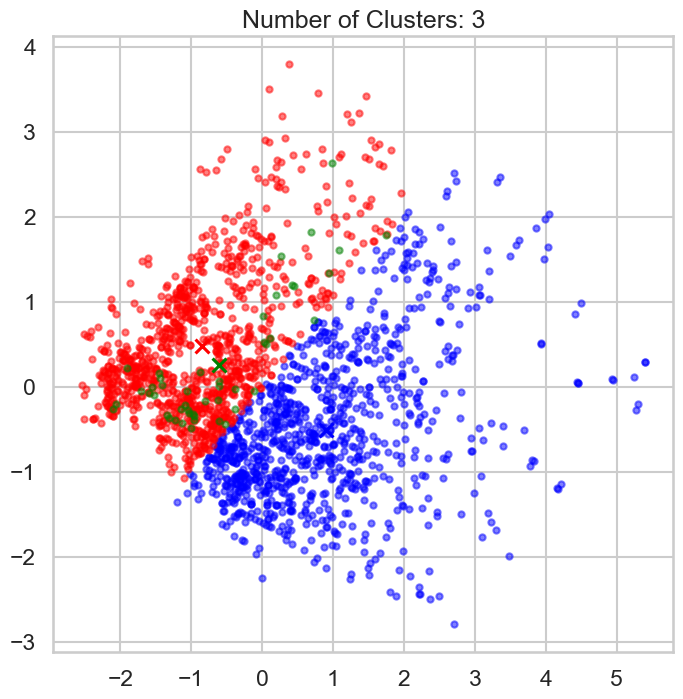

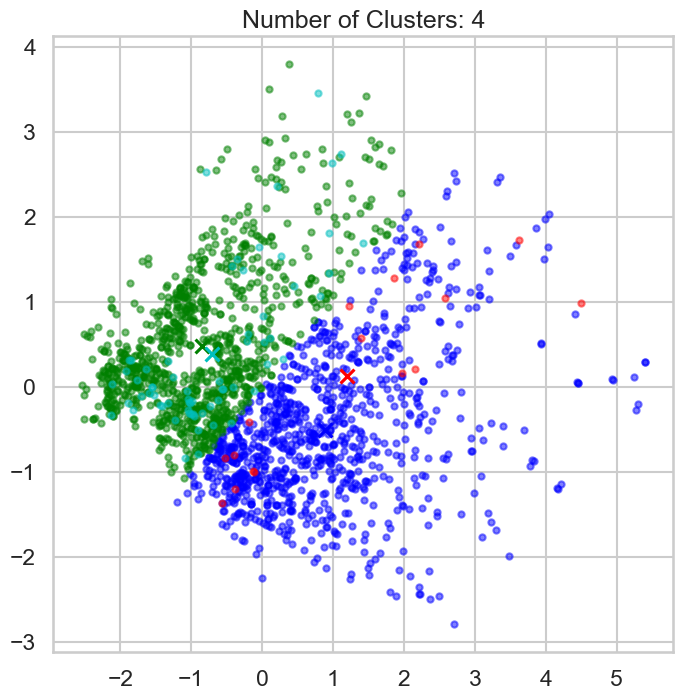

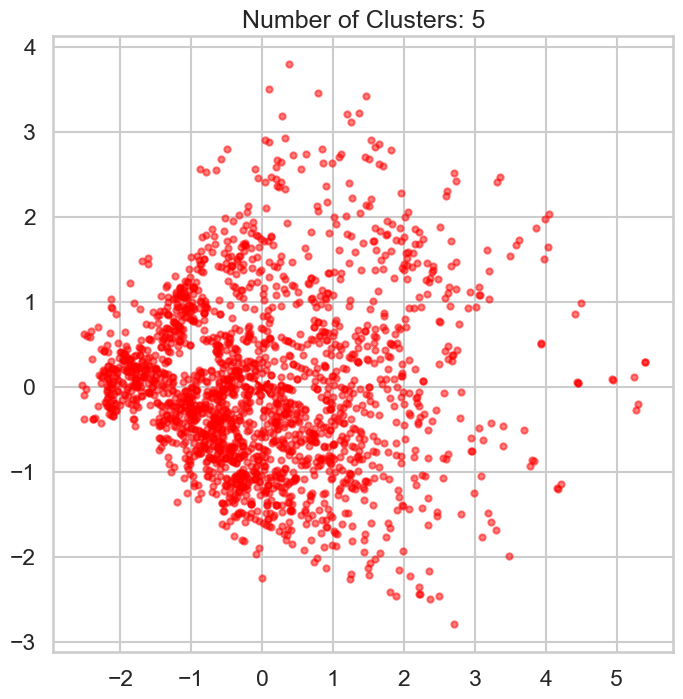

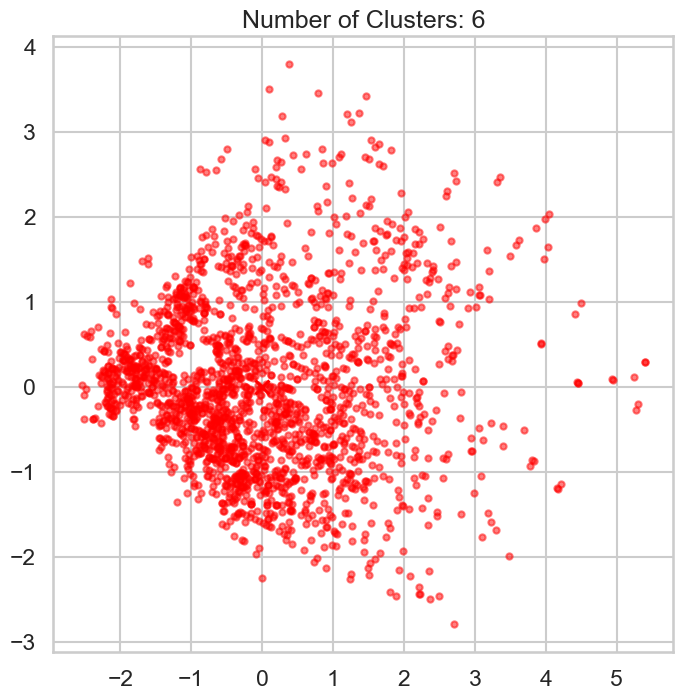

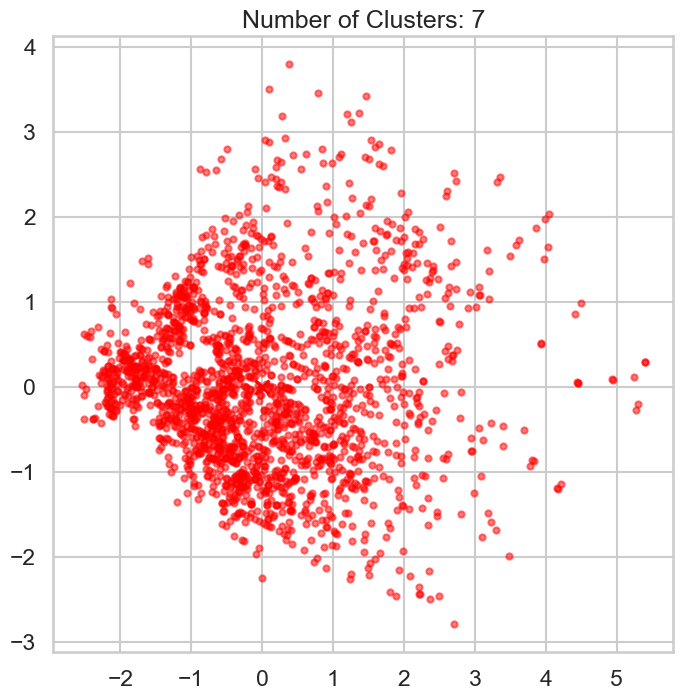

IndexError: list index out of range

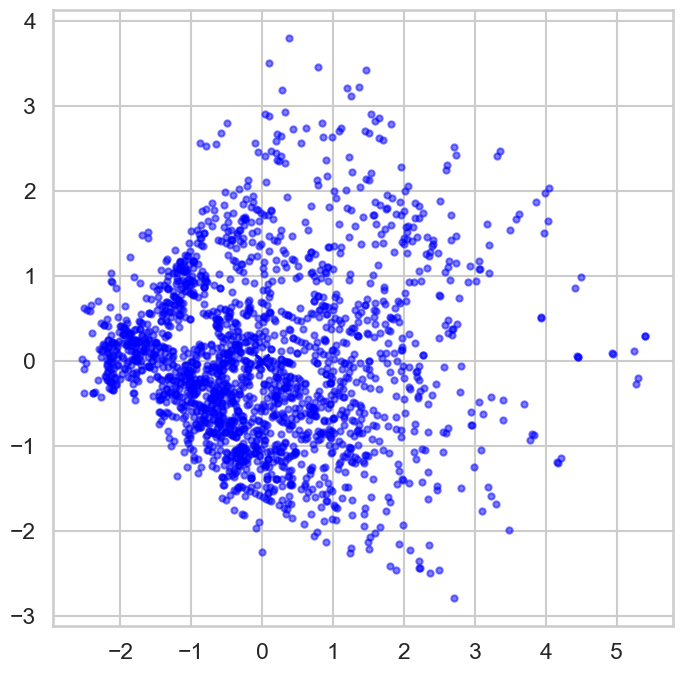

In [89]:
num_clusters_range = range(2, 9)
for Number_of_Clusters in num_clusters_range:
    cluster_heads, cluster_assignments, cluster_metric = GUC_Kmean(Data, Number_of_Clusters, 'pearson')
    display_cluster(Data, km=(cluster_heads, cluster_assignments), num_clusters=Number_of_Clusters)
    plt.title(f'Number of Clusters: {Number_of_Clusters}')
    plt.show()